<a href="https://colab.research.google.com/github/Varun0801/MachineLearning/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import itertools
import numpy as np,matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
ds = pd.read_csv("datasets_577170_1055509_russian_air_service_CARGO_AND_PARCELS.csv")
ds.head()

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,43.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,122.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('177.738273'), Decimal('64.713433'))"


In [3]:
ds.describe()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,2013.324161,146.473921,163.180227,192.757854,196.401007,194.834029,191.292414,194.807246,206.446110,212.699735,224.843878,223.936299,234.541005,2368.033661
std,3.969638,1055.327321,1089.978840,1360.226578,1342.942838,1345.871482,1333.407063,1363.037348,1421.504136,1463.416493,1541.096840,1562.518653,1547.251287,16276.181160
min,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,23251.200000,22765.700000,27617.900000,28634.200000,27026.400000,30202.600000,28158.600000,28298.200000,29620.100000,30608.600000,32723.900000,32533.800000,329817.200000


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Airport name         3961 non-null   object 
 1   Year                 3961 non-null   int64  
 2   January              3961 non-null   float64
 3   February             3961 non-null   float64
 4   March                3961 non-null   float64
 5   April                3961 non-null   float64
 6   May                  3961 non-null   float64
 7   June                 3961 non-null   float64
 8   July                 3961 non-null   float64
 9   August               3961 non-null   float64
 10  September            3961 non-null   float64
 11  October              3961 non-null   float64
 12  November             3961 non-null   float64
 13  December             3961 non-null   float64
 14  Whole year           3961 non-null   float64
 15  Airport coordinates  3961 non-null   o

In [5]:
print('Number of rows:', ds.shape[0])
print('Number of Airports:', ds['Airport name'].nunique())
print('First Year:', ds['Year'].min())
print('Last Year:', ds['Year'].max())

Number of rows: 3961
Number of Airports: 298
First Year: 2007
Last Year: 2020


In [6]:
months = ds.columns[~ds.columns.isin([
    'Airport name',
    'Airport coordinates',
    'Whole year', 'Year'
])]
mapping= {v: k for k,v in enumerate(months, start=1)} 

In [7]:
time_series = ds.melt(
    id_vars=['Airport name', 'Year'],
    value_vars=months,
    var_name='Month',
    value_name="cargo_&_parcel"
)
time_series.head(14)

,Airport name,Year,Month,cargo_&_parcel
0,Abakan,2020,January,43.58
1,Aikhal,2020,January,0.00
2,Loss,2020,January,0.00
3,Amderma,2020,January,0.00
4,Anadyr (Carbon),2020,January,122.00
5,Anapa (Vitjazevo),2020,January,49.08
6,Apatite (Khibiny),2020,January,0.00
7,Arkhangelsk (Vaskovo),2020,January,0.00
8,Arkhangelsk (Talagy),2020,January,96.00
9,Astrakhan (Narimanovo),2020,January,53.55


In [8]:
time_series['date'] = time_series.apply(lambda x: f"{x['Year']}-{mapping[x['Month']]:02d}", axis=1)

time_series['date'] = pd.to_datetime(time_series['date']) 

In [9]:
# Covert type
time_series = (
    time_series
    .rename(columns={'Airport name': 'airport', 'value': 'cargo_&_parcel'})
    .drop(columns=['Year', 'Month'])
)
time_series.head()

,airport,cargo_&_parcel,date
0,Abakan,43.58,2020-01-01
1,Aikhal,0.00,2020-01-01
2,Loss,0.00,2020-01-01
3,Amderma,0.00,2020-01-01
4,Anadyr (Carbon),122.00,2020-01-01


In [10]:
rpass=time_series.groupby(["date"])["cargo_&_parcel"].sum()/1000
rpass.loc[:'2020-01-01'] 
rpass.head()

date
2007-01-01    34.03241
2007-02-01    45.42790
2007-03-01    49.52172
2007-04-01    52.54509
2007-05-01    52.86926
Name: cargo_&_parcel, dtype: float64

In [11]:
rpass['2010':] #yearwise data

date
2010-01-01    33.56683
2010-02-01    44.42640
2010-03-01    52.99606
2010-04-01    54.76110
2010-05-01    58.07505
                ...   
2020-08-01     0.00000
2020-09-01     0.00000
2020-10-01     0.00000
2020-11-01     0.00000
2020-12-01     0.00000
Name: cargo_&_parcel, Length: 132, dtype: float64

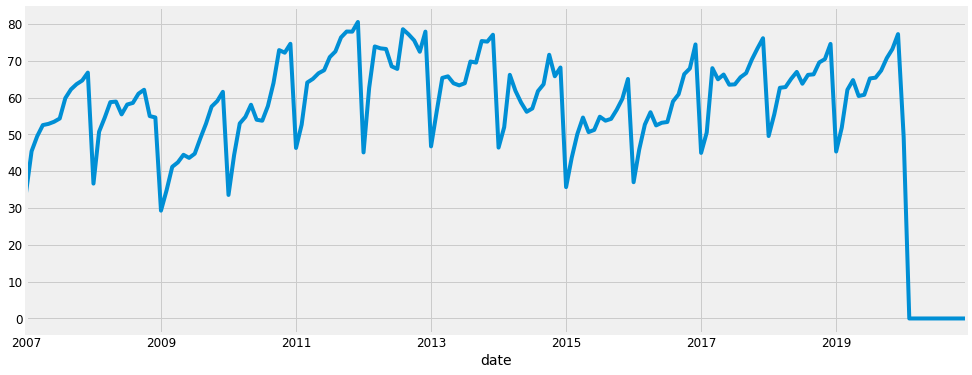

In [12]:
# Visualize furniture sales time series data 
rpass.plot(figsize =(15,6))
plt.show()


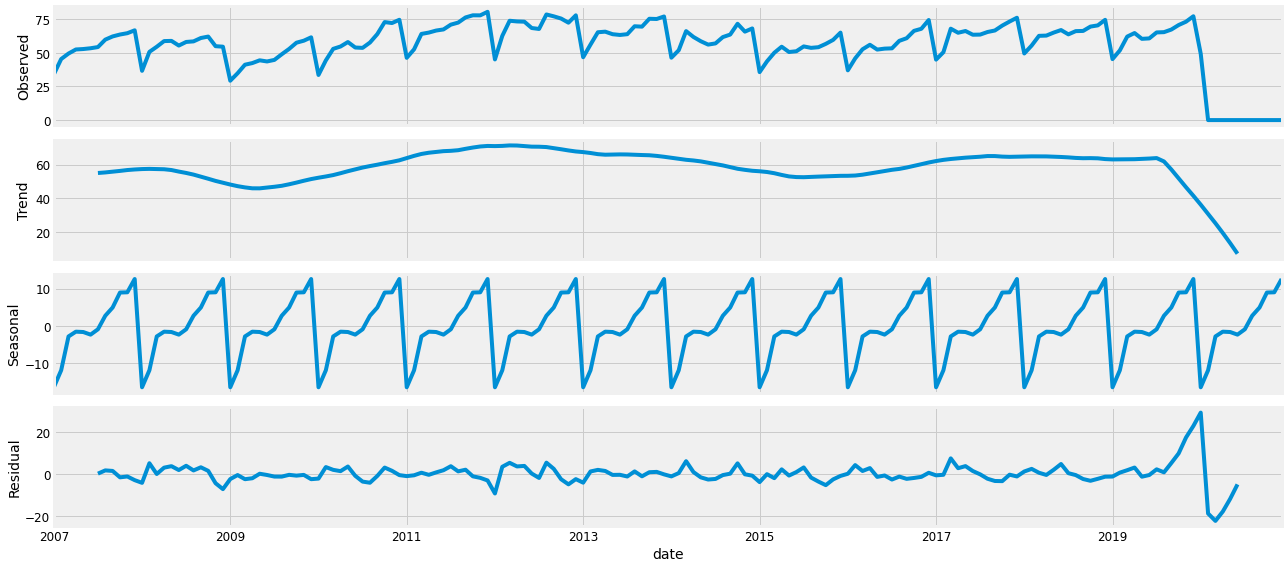

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(rpass,model="additive")
fig = decomposition.plot()
plt.show()

In [18]:
p=d=q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(rpass[0],rpass[1],rpass[2],12) for rpass in list(itertools.product(p,d,q))]
print("SARIMAX:{} X {}".format(pdq[1],seasonal_pdq[1]))
print("SARIMAX:{} X {}".format(pdq[1],seasonal_pdq[2]))
print("SARIMAX:{} X {}".format(pdq[1],seasonal_pdq[3]))
print("SARIMAX:{} X {}".format(pdq[1],seasonal_pdq[4]))

SARIMAX:(0, 0, 1) X (0, 0, 1, 12)
SARIMAX:(0, 0, 1) X (0, 1, 0, 12)
SARIMAX:(0, 0, 1) X (0, 1, 1, 12)
SARIMAX:(0, 0, 1) X (1, 0, 0, 12)


In [19]:
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
      results = mod.fit()
      print("ARIMA{}x{}12-AIC:{}".format(param,param_seasonal,results.aic))
    except:
      continue

In [21]:
mod = sm.tsa.statespace.SARIMAX(rpass,order=(1,1,1),seasonal_order=(1,1,0,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results=mod.fit()
print(results.su mmary().tables[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5805      4.055      0.143      0.886      -7.368       8.529
ma.L1         -0.5494      4.064     -0.135      0.892      -8.515       7.416
ar.S.L12      -0.5447      0.194     -2.802      0.005      -0.926      -0.164
sigma2        32.7735      0.794     41.295      0.000      31.218      34.329


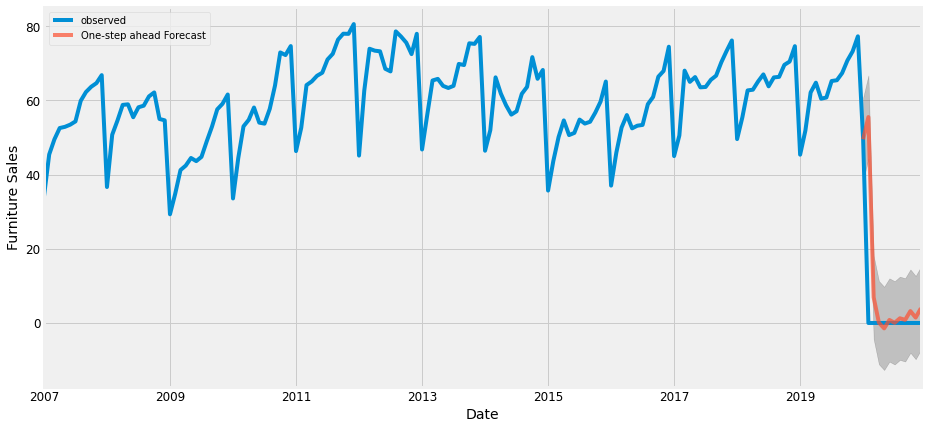

In [26]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'),dynamic=False)
pred_ci = pred.conf_int()
ax = rpass['2007':].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',alpha = 0.7,figsize=(14,7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],color='k',alpha=0.2)
ax.set_xlabel("Date")
ax.set_ylabel("Furniture Sales")
plt.legend()
plt.show()


In [27]:
rpass_forecasted = pred.predicted_mean
rpass_truth = rpass["2020-01-01":]
#compute the mean square error
mse = ((rpass_forecasted-rpass_truth)**2).mean()
print("Mean Square error of Forecast is {}".format(round(mse,2)))
print("Root Mean Squared error of forcast is {}".format(round(np.sqrt(mse),2)))

Mean Square error of Forecast is 263.48
Root Mean Squared error of forcast is 16.23
